# Swiggy sales analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
df=pd.read_excel('swiggy_data.xlsx')

In [11]:
df.head()

,State,City,Order Date,Restaurant Name,Location,Category,Dish Name,Price (INR),Rating,Rating Count
0,Karnataka,Bengaluru,2025-06-29,Anand Sweets & Savouries,Rajarajeshwari Nagar,Snack,Butter Murukku-200gm,133.9,4.0,0
1,Karnataka,Bengaluru,2025-04-03,Srinidhi Sagar Deluxe,Kengeri,Recommended,Badam Milk,52.0,4.5,25
2,Karnataka,Bengaluru,2025-01-15,Srinidhi Sagar Deluxe,Kengeri,Recommended,Chow Chow Bath,117.0,4.7,48
3,Karnataka,Bengaluru,2025-04-17,Srinidhi Sagar Deluxe,Kengeri,Recommended,Kesari Bath,65.0,4.6,65
4,Karnataka,Bengaluru,2025-03-13,Srinidhi Sagar Deluxe,Kengeri,Recommended,Mix Raitha,130.0,4.0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197430 entries, 0 to 197429
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   State            197430 non-null  object        
 1   City             197430 non-null  object        
 2   Order Date       197430 non-null  datetime64[ns]
 3   Restaurant Name  197430 non-null  object        
 4   Location         197430 non-null  object        
 5   Category         197430 non-null  object        
 6   Dish Name        197430 non-null  object        
 7   Price (INR)      197430 non-null  float64       
 8   Rating           197430 non-null  float64       
 9   Rating Count     197430 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.1+ MB


In [19]:
df.describe()

,Order Date,Price (INR),Rating,Rating Count
count,197430,197430.000000,197430.000000,197430.000000
mean,2025-05-01 19:41:20.996808960,268.512920,4.341582,28.321805
min,2025-01-01 00:00:00,0.950000,1.500000,0.000000
25%,2025-03-01 00:00:00,139.000000,4.300000,0.000000
50%,2025-05-02 00:00:00,229.000000,4.400000,2.000000
75%,2025-07-01 00:00:00,329.000000,4.500000,15.000000
max,2025-08-31 00:00:00,8000.000000,5.000000,999.000000
std,NaN,219.338363,0.422585,87.542593


In [20]:
df.shape[0]#--No of  Rows

197430

In [21]:
df.shape[1]

10

In [24]:
total_sales=df["Price (INR)"].sum()
print(f"Total sales (INR): {round(total_sales,2)}")

Total sales (INR): 53012505.77


In [27]:
average_rating=df["Rating"].mean()
print(f"Average rating {round(average_rating,2)}")

Average rating 4.34


In [32]:
average_order_value=df["Price (INR)"].mean()
print(f"Average order value: {round(average_order_value,2)} ")

Average order value: 268.51 


In [33]:
Total_rating=df["Rating Count"].sum()
print(f"Total rating count is: {Total_rating}")

Total rating count is: 5591574


In [35]:
Total_orders=df["Category"].count()
print(f"Total order count is: {Total_orders}")

Total order count is: 197430


In [37]:
Total_orders=len(df)
print(f"Total order count is: {Total_orders}")

Total order count is: 197430


# Charts

  YearMonth  Price (INR)
0   2025-01   6825186.03
1   2025-02   6269105.67
2   2025-03   6573530.07
3   2025-04   6594515.00
4   2025-05   6793558.40
5   2025-06   6514183.19
6   2025-07   6650965.51
7   2025-08   6791461.90


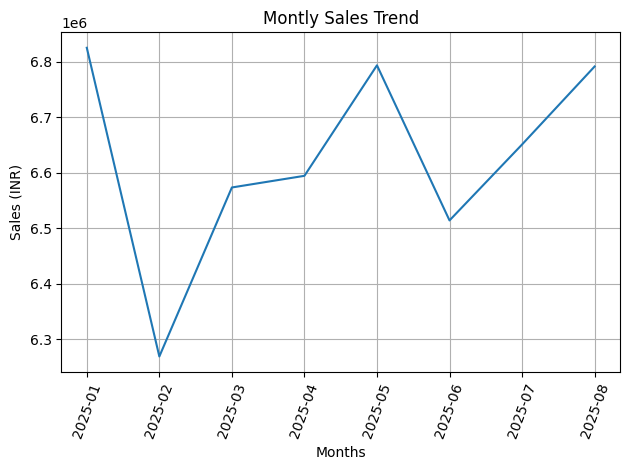

In [ ]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["YearMonth"]=df["Order Date"].dt.to_period("M").astype(str) 
monthly_revenue=df.groupby(df["YearMonth"])["Price (INR)"].sum().reset_index()
plt.xticks(rotation=70)
plt.xlabel("Months")
plt.ylabel("Sales (INR)")
plt.title("Montly Sales Trend")
plt.plot(monthly_revenue["YearMonth"],monthly_revenue["Price (INR)"])
plt.tight_layout()
plt.grid()
plt.show()

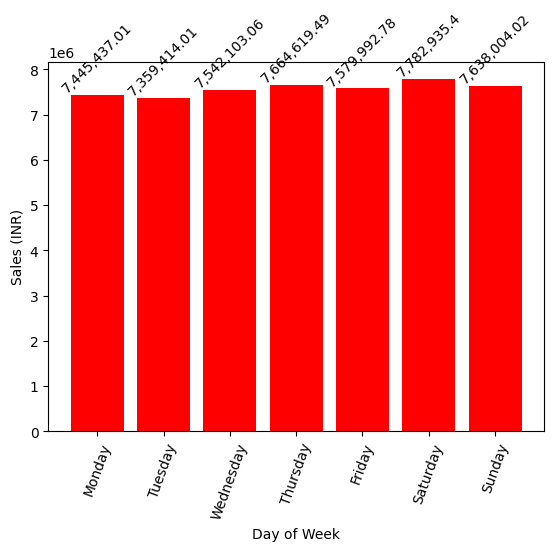

In [84]:
df["DayName"]=df["Order Date"].dt.day_name().astype(str)
Daily_sales=df.groupby(df["DayName"])["Price (INR)"].sum().reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.tight_layout()
plt.xlabel("Day of Week")
plt.xticks(rotation=70)
plt.ylabel("Sales (INR)")
for x, y in zip(Daily_sales.index, Daily_sales.values):
    plt.text(x, y, f"{y:,}", ha='center', va='bottom',rotation=45)

plt.bar(Daily_sales.index,Daily_sales.values,color="red")
plt.show()

In [87]:
non_veg_keywords = [
"chicken", "egg", "fish", "mutton",
"prawn", "biryani", "kabab", "kebab",
"non-veg", "non veg"]

df["Food category"]=np.where(df["Dish Name"].str.lower().str.contains("|".join(non_veg_keywords),na=False),"Non veg","veg")

In [107]:
Food_revenue=(df.groupby(df["Food category"])["Price (INR)"].sum().reset_index())
fig=px.pie(Food_revenue,values=Food_revenue["Price (INR)"],names=Food_revenue["Food category"],hole=0.5,title="Revenue comparision veg vs non veg")
fig.update_traces(textinfo="percent+label",
                  pull=[0.05,0]
                  )
fig.update_layout(
    height=500,
    margin=dict(t=60,b=40,l=40,r=40)
)
fig.show()

In [125]:
Total_sales_state=df.groupby(df["State"],as_index=False)["Price (INR)"].sum().sort_values("Price (INR)",ascending=False)
fig=px.bar(Total_sales_state,x=Total_sales_state["Price (INR)"],y=Total_sales_state["State"],orientation="h",title="Revenue by state")
fig.update_layout(height=800,yaxis=dict(autorange="reversed"))
fig.show()

In [132]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Quaterly"]=df["Order Date"].dt.to_period("Q").astype(str)
Quaterly_Summary=(df.groupby(df["Quaterly"],as_index=False).agg(total_sales=("Price (INR)","sum"),average_rating=("Rating","mean"),Total_orders=("State","count")).sort_values("Quaterly")
)
Quaterly_Summary["Total_orders"]=Quaterly_Summary["Total_orders"].round(0)
Quaterly_Summary["average_rating"]=Quaterly_Summary["average_rating"].round(0)
Quaterly_Summary

,Quaterly,total_sales,average_rating,Total_orders
0,2025Q1,19667821.77,4.0,73096
1,2025Q2,19902256.59,4.0,74163
2,2025Q3,13442427.41,4.0,50171


In [141]:
Top5city=df.groupby("City")["Price (INR)"].sum().nlargest(5).sort_values(ascending=False).reset_index()
fig=px.bar(Top5city,x=Top5city["City"],y=Top5city["Price (INR)"],title="Top Cities By Sales(INR)",color_discrete_sequence=["red"])
fig.show()

In [155]:
df["Order Date"]=pd.to_datetime(df["Order Date"])
df["Weekly"]=df["Order Date"].dt.to_period("W").astype(str)
Weeklytrend=df.groupby(df["Weekly"]).agg(Total_sales=("Price (INR)","sum"),Total_orders=("State","count")).reset_index().sort_values("Total_sales",ascending=False)
fig=px.bar(Weeklytrend,x=Weeklytrend["Weekly"],y=Weeklytrend["Total_sales"],title="Weekly Sales Report")

fig.show()

